<a href="https://colab.research.google.com/github/LamineGith/PyTorch/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder with both traditional NN and CNN

An autoencoder neural network is an unsupervised machine learning algorithm. In an autoencoder, the number of hidden cells is smaller than the input cells. The number of input cells in autoencoders equals to the number of output cells. On an AE network, we train it to display the output, which is as close as the fed input, which forces AEs to find common patterns and generalize the data. We use autoencoders for the smaller representation of the input.

It is composed of two main parts: an encoder and a decoder. The encoder maps the input data to a lower-dimensional representation (also known as the bottleneck or latent representation), and the decoder maps the bottleneck representation back to the original input space. The goal of the autoencoder is to learn a compact representation of the input data that can be used for tasks such as dimensionality reduction, denoising, and generative modeling.

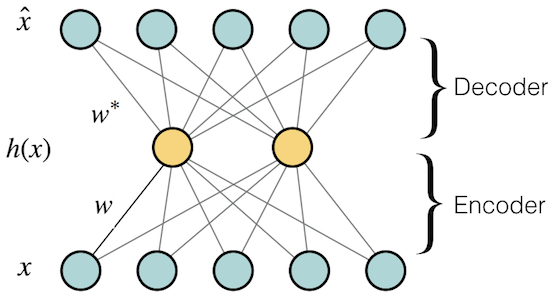

## Autoencoder with traiditional NN

In [35]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

# Define the transform to preprocess the data
transform = transforms.Compose([transforms.ToTensor()])

# Load the MNIST dataset
mnist_data = datasets.MNIST(root='.', train=True, download=True, transform=transform)

# Define the data loader
data_loader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)


In [49]:
mnist_data.classes


['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [51]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32))
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid())

    def forward(self, x):
        latent = self.encoder(x)
        x = self.decoder(latent)
        return x,latent

# Define the model and move it to the device
model = Autoencoder()
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model.parameters

<bound method Module.parameters of Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=784, bias=True)
    (5): Sigmoid()
  )
)>

In [36]:

# Train the model
for epoch in range(10):
    for data in data_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = img.to(device)

        output, latent = model(img)
        loss = criterion(output, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1, 10, loss.item()))

Epoch [1/10], Loss: 0.0288
Epoch [2/10], Loss: 0.0210
Epoch [3/10], Loss: 0.0199
Epoch [4/10], Loss: 0.0156
Epoch [5/10], Loss: 0.0139
Epoch [6/10], Loss: 0.0136
Epoch [7/10], Loss: 0.0129
Epoch [8/10], Loss: 0.0142
Epoch [9/10], Loss: 0.0121
Epoch [10/10], Loss: 0.0107


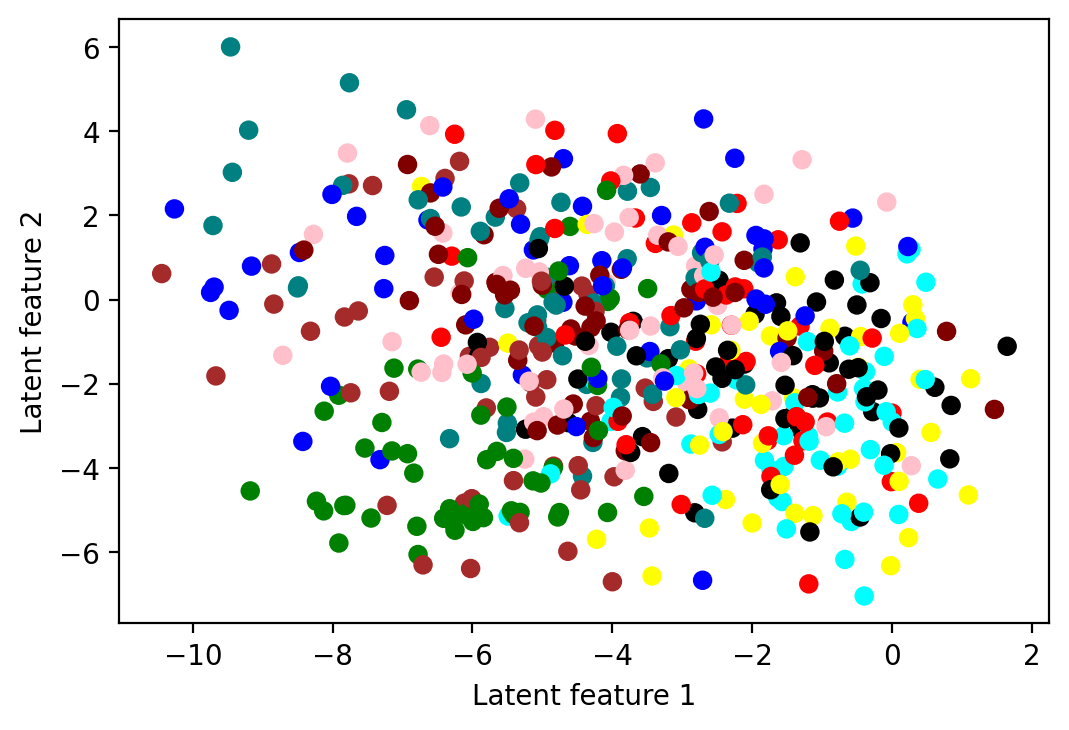

In [43]:
# Visualize the original and reconstructed images
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

dataloader = DataLoader(mnist_data, batch_size=512, shuffle=True)
for data in dataloader:
        img, labels = data
        img = img.view(img.size(0), -1)    
        model.cpu()    
        _,latent = model(img)
        break

d = {0: 'red', 1: "green", 2: "blue", 3: "maroon", 4: "yellow", 
     5: "pink", 6: "brown", 7: "black", 8: "teal", 9: "aqua"}

colors = []       
for e in labels.numpy():
    colors.append(d[e])

fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
ax.set_xlabel('Latent feature 1')
ax.set_ylabel('Latent feature 2')

ax.scatter(latent[:,0].detach().numpy(), latent[:,1].detach().numpy(), 
           c=list(colors))

## Autoencoder with CNN

In [18]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 6, kernel_size=2, stride=2),
            nn.ReLU(True),
            nn.ConvTranspose2d(6, 3, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Create the model
model = Autoencoder()

In [19]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Load the data
transform = transforms.Compose(
    [transforms.Resize(256),
     transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)


Files already downloaded and verified


In [20]:
model.parameters

<bound method Module.parameters of Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 6, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(6, 3, kernel_size=(2, 2), stride=(2, 2))
    (3): Sigmoid()
  )
)>

In [21]:
device

device(type='cuda')

In [22]:
model = model.to(device)
for epoch in range(5):
    for data in trainloader:
        img, _ = data
        img = img.to(device)
        # Forward pass
        output = model(img)
        loss = criterion(output, img)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('eppoch [{}/{}], loss:{:.4f}'.format(epoch+1, 5, loss.item()))

eppoch [1/5], loss:0.0070
eppoch [2/5], loss:0.0037
eppoch [3/5], loss:0.0014
eppoch [4/5], loss:0.0016
eppoch [5/5], loss:0.0016
